# Online Exam Analysis

## Phases

<li><b>Ask</b>: The data analyst is given a problem/business task. <br>
<li><b>Prepare</b>: This step includes collecting data and storing it for further analysis. <br>
<li><b>Process</b>: After the data is collected from multiple sources, it is time to clean the data. <br>
<li><b>Analyse</b>: The cleaned data is used for analyzing and identifying trends. <br>
<li><b>Share</b>: The data now transformed has to be made into a visual(chart, graph). <br>
<li><b>Act</b>: After a presentation is given based on your findings, the stakeholders discuss whether to move forward or not.<br>

## Ask

<li> The stakeholders expects a clear and informative data visualization. 
<li>Visualizations should effectively communicate the findings from the data analysis stage. 
<li>The goal is to present the insights in a visually appealing and easy-to-understand manner.
<li>The stakeholders require a predictive modeling component as part of the project. 
<li>This involves building a machine learning model to predict a specific target variable based on the dataset. 
<li>The model should be trained on a subset of the data and evaluated for its performance on unseen data to ensure generalizability.


## Prepare

<li>The first step was to search for potential datasets that would be suitable for the analysis and prediction tasks. We considered various data sources, for this task.
<li>After assessing multiple datasets, We narrowed down the essential parameters that would represent the specific features and attributes of the dataset that are crucial for conducting analysis and building a predictive model. 
<li>One of the critical steps in the project was to identify the target variable for the prediction task. The target variable represents the outcome or the variable to be predicted using the chosen dataset's features.


### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv("online_exam_data.csv")
dataset

,student_name,exam_mode,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
0,Abby Elmes,remote,20,10,6,4.0,5,12,fail,60,757,12,Genuine
1,Abeu Goning,remote,50,18,10,10.0,18,30,fail,150,7302,121,Genuine
2,Ad Heggison,center_based,40,37,28,22.0,30,24,pass,120,4345,72,Genuine
3,Adah Island,remote,20,18,15,11.0,12,12,pass,60,3179,52,Genuine
4,Adah Reading,remote,30,14,5,1.0,11,18,fail,90,241,4,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,Zitella O'Shesnan,remote,20,13,10,2.0,4,12,fail,60,1689,28,Genuine
1601,Zoe Perren,remote,50,42,19,5.0,32,30,pass,150,6846,114,Genuine
1602,Zola Royds,remote,20,18,15,8.0,17,12,pass,60,1180,19,Genuine
1603,Zorina Oki,remote,30,15,6,2.0,9,18,fail,90,2882,48,Genuine


In [3]:
columns = dataset.columns
no_of_columns = len(columns)
columns, no_of_columns

(Index(['student_name', 'exam_mode', 'tot_question', 'tot_que_attempted',
        'que_att_within_idl_time', 'idl_time_correct_que', 'tot_correct_que',
        'questions_to_pass', 'result', 'tot_exam_time',
        'exam_finish_time_in_sec', 'finish_time_in_min', 'prediction'],
       dtype='object'),
 13)

In [4]:
dataset.isna().sum()

student_name               0
exam_mode                  0
tot_question               0
tot_que_attempted          0
que_att_within_idl_time    0
idl_time_correct_que       2
tot_correct_que            0
questions_to_pass          0
result                     0
tot_exam_time              0
exam_finish_time_in_sec    0
finish_time_in_min         0
prediction                 0
dtype: int64

In [5]:
for i in range(no_of_columns):
    print(columns[i], dataset.iloc[:,i].nunique() ,dataset.iloc[:,i].unique())

student_name 1600 ['Abby Elmes' 'Abeu Goning' 'Ad Heggison' ... 'Zola Royds' 'Zorina Oki'
 'Zsa zsa Watkinson']
exam_mode 2 ['remote' 'center_based']
tot_question 4 [20 50 40 30]
tot_que_attempted 41 [10 18 37 14 22 20 33 19 16 28 13 40 32 25 29 34 23 38 15 24 12 21 39 11
 44 17 26 36 31 30 42 45 27 41 46 35 47 49 43 50 48]
que_att_within_idl_time 45 [ 6 10 28 15  5 13  0 20 14  7  3 37 23  8  4 17 16  2 11 12 19 33 29  1
  9 18 31 24 30 36 25 22 21 34 26 32 27 39 44 38 35 40 43 47 41]
idl_time_correct_que 35 [ 4. 10. 22. 11.  1.  5.  0.  3. nan  7.  6.  2.  9. 12. 23.  8. 13. 31.
 24. 14. 15. 19. 20. 16. 27. 25. 21. 17. 35. 26. 29. 18. 36. 33. 28. 30.]
tot_correct_que 47 [ 5 18 30 12 11 22  7  6 14 19  1 16 20 21  9 17  3 15 10  8  0  4 23 39
 24 13 31 32 36 27 26 25 34 38 37 28  2 35 42 29 43 41 40 44 33 50 45]
questions_to_pass 4 [12 30 24 18]
result 2 ['fail' 'pass']
tot_exam_time 4 [ 60 150 120  90]
exam_finish_time_in_sec 1448 [ 757 7302 4345 ... 1180 2882 5225]
finish_time_in_mi

In [6]:
dataset[dataset['idl_time_correct_que'].isna()]

,student_name,exam_mode,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
11,Adolph Maulkin,remote,40,28,7,NaN,19,24,fail,120,6532,108,Genuine
12,Adorne Carden,center_based,30,13,3,NaN,1,18,fail,90,5168,86,Genuine


In [7]:
dataset['idl_time_correct_que'].value_counts()

0.0     281
1.0     211
2.0     165
4.0     137
3.0     122
5.0     106
6.0      95
7.0      66
9.0      60
10.0     44
8.0      41
11.0     40
12.0     31
15.0     28
13.0     27
14.0     25
16.0     19
19.0     17
17.0     13
20.0     10
18.0      9
23.0      7
21.0      7
22.0      7
24.0      5
25.0      5
27.0      5
31.0      5
26.0      4
29.0      3
28.0      3
30.0      2
35.0      1
36.0      1
33.0      1
Name: idl_time_correct_que, dtype: int64

In [8]:
dataset['idl_time_correct_que']=dataset['idl_time_correct_que'].fillna(0)
dataset.isna().sum()

student_name               0
exam_mode                  0
tot_question               0
tot_que_attempted          0
que_att_within_idl_time    0
idl_time_correct_que       0
tot_correct_que            0
questions_to_pass          0
result                     0
tot_exam_time              0
exam_finish_time_in_sec    0
finish_time_in_min         0
prediction                 0
dtype: int64

'student_name': Ordinal <br>
'exam_mode': Categorical <br>
'tot_question': Numerical <br>
'tot_que_attempted': Numerical <br>
'que_att_within_idl_time': Numerical <br>
'idl_time_correct_que': Numerical <br>
'tot_correct_que': Numerical <br>
'questions_to_pass': Numerical <br>
'result': Categorical <br>
'tot_exam_time': Numerical <br>
'exam_finish_time_in_sec': Numerical <br>
'finish_time_in_min': Numerical <br>
'prediction': Categorical <br>

In [9]:
dataset = dataset.drop(["student_name"], axis=1)
dataset

,exam_mode,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
0,remote,20,10,6,4.0,5,12,fail,60,757,12,Genuine
1,remote,50,18,10,10.0,18,30,fail,150,7302,121,Genuine
2,center_based,40,37,28,22.0,30,24,pass,120,4345,72,Genuine
3,remote,20,18,15,11.0,12,12,pass,60,3179,52,Genuine
4,remote,30,14,5,1.0,11,18,fail,90,241,4,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...
1600,remote,20,13,10,2.0,4,12,fail,60,1689,28,Genuine
1601,remote,50,42,19,5.0,32,30,pass,150,6846,114,Genuine
1602,remote,20,18,15,8.0,17,12,pass,60,1180,19,Genuine
1603,remote,30,15,6,2.0,9,18,fail,90,2882,48,Genuine


In [10]:
dataset = pd.get_dummies(dataset, columns = ['exam_mode'])
dataset

,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction,exam_mode_center_based,exam_mode_remote
0,20,10,6,4.0,5,12,fail,60,757,12,Genuine,0,1
1,50,18,10,10.0,18,30,fail,150,7302,121,Genuine,0,1
2,40,37,28,22.0,30,24,pass,120,4345,72,Genuine,1,0
3,20,18,15,11.0,12,12,pass,60,3179,52,Genuine,0,1
4,30,14,5,1.0,11,18,fail,90,241,4,Genuine,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,20,13,10,2.0,4,12,fail,60,1689,28,Genuine,0,1
1601,50,42,19,5.0,32,30,pass,150,6846,114,Genuine,0,1
1602,20,18,15,8.0,17,12,pass,60,1180,19,Genuine,0,1
1603,30,15,6,2.0,9,18,fail,90,2882,48,Genuine,0,1


In [11]:
dataset.insert(0, "exam_mode_center_based", dataset.pop("exam_mode_center_based"))
dataset.insert(1, "exam_mode_remote", dataset.pop("exam_mode_remote"))
dataset

,exam_mode_center_based,exam_mode_remote,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
0,0,1,20,10,6,4.0,5,12,fail,60,757,12,Genuine
1,0,1,50,18,10,10.0,18,30,fail,150,7302,121,Genuine
2,1,0,40,37,28,22.0,30,24,pass,120,4345,72,Genuine
3,0,1,20,18,15,11.0,12,12,pass,60,3179,52,Genuine
4,0,1,30,14,5,1.0,11,18,fail,90,241,4,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,0,1,20,13,10,2.0,4,12,fail,60,1689,28,Genuine
1601,0,1,50,42,19,5.0,32,30,pass,150,6846,114,Genuine
1602,0,1,20,18,15,8.0,17,12,pass,60,1180,19,Genuine
1603,0,1,30,15,6,2.0,9,18,fail,90,2882,48,Genuine


In [12]:
dict_result = {'pass':1, 'fail':0}
dict_prediction = {'Genuine':1, 'Cheating':0}
dataset['result'] = dataset['result'].map(dict_result)
dataset['prediction'] = dataset['prediction'].map(dict_prediction)
dataset

,exam_mode_center_based,exam_mode_remote,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
0,0,1,20,10,6,4.0,5,12,0,60,757,12,1
1,0,1,50,18,10,10.0,18,30,0,150,7302,121,1
2,1,0,40,37,28,22.0,30,24,1,120,4345,72,1
3,0,1,20,18,15,11.0,12,12,1,60,3179,52,1
4,0,1,30,14,5,1.0,11,18,0,90,241,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,0,1,20,13,10,2.0,4,12,0,60,1689,28,1
1601,0,1,50,42,19,5.0,32,30,1,150,6846,114,1
1602,0,1,20,18,15,8.0,17,12,1,60,1180,19,1
1603,0,1,30,15,6,2.0,9,18,0,90,2882,48,1


In [13]:
dataset.columns

Index(['exam_mode_center_based', 'exam_mode_remote', 'tot_question',
       'tot_que_attempted', 'que_att_within_idl_time', 'idl_time_correct_que',
       'tot_correct_que', 'questions_to_pass', 'result', 'tot_exam_time',
       'exam_finish_time_in_sec', 'finish_time_in_min', 'prediction'],
      dtype='object')

In [14]:
dataset.describe()

,exam_mode_center_based,exam_mode_remote,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,0.331464,0.668536,35.015576,22.435514,11.282243,5.547664,14.024299,21.009346,0.248598,105.046729,3192.411838,52.720872,0.951402
std,0.470886,0.470886,11.186601,9.761960,8.699082,6.132148,9.025803,6.711960,0.432335,33.559802,2171.780010,36.190864,0.215093
min,0.000000,0.000000,20.000000,10.000000,0.000000,0.000000,0.000000,12.000000,0.000000,60.000000,60.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,15.000000,5.000000,1.000000,7.000000,18.000000,0.000000,90.000000,1434.000000,23.000000,1.000000
50%,0.000000,1.000000,40.000000,20.000000,10.000000,4.000000,12.000000,24.000000,0.000000,120.000000,2815.000000,46.000000,1.000000
75%,1.000000,1.000000,50.000000,29.000000,16.000000,8.000000,18.000000,30.000000,0.000000,150.000000,4608.000000,76.000000,1.000000
max,1.000000,1.000000,50.000000,50.000000,47.000000,36.000000,50.000000,30.000000,1.000000,150.000000,8996.000000,149.000000,1.000000


In [15]:
for i in range(no_of_columns):
    minimum = min(dataset.iloc[:,i])
    maximum = max(dataset.iloc[:,i])
    dataset[columns[i]] = (dataset.iloc[:,i] - minimum) / (maximum- minimum)
dataset.describe()

,exam_mode_center_based,exam_mode_remote,tot_question,tot_que_attempted,que_att_within_idl_time,idl_time_correct_que,tot_correct_que,questions_to_pass,result,tot_exam_time,exam_finish_time_in_sec,finish_time_in_min,prediction,student_name,exam_mode
count,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,0.331464,0.668536,0.500519,0.310888,0.240048,0.154102,0.280486,0.500519,0.248598,0.500519,0.350538,0.349465,0.951402,0.331464,0.668536
std,0.470886,0.470886,0.372887,0.244049,0.185087,0.170337,0.180516,0.372887,0.432335,0.372887,0.243037,0.244533,0.215093,0.470886,0.470886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.125000,0.106383,0.027778,0.140000,0.333333,0.000000,0.333333,0.153760,0.148649,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.666667,0.250000,0.212766,0.111111,0.240000,0.666667,0.000000,0.666667,0.308303,0.304054,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.475000,0.340426,0.222222,0.360000,1.000000,0.000000,1.000000,0.508953,0.506757,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
dataset = dataset.drop(['student_name','exam_mode'], axis=1)

In [29]:
dataset.corr().to_csv('correlation.csv')

<Axes: >

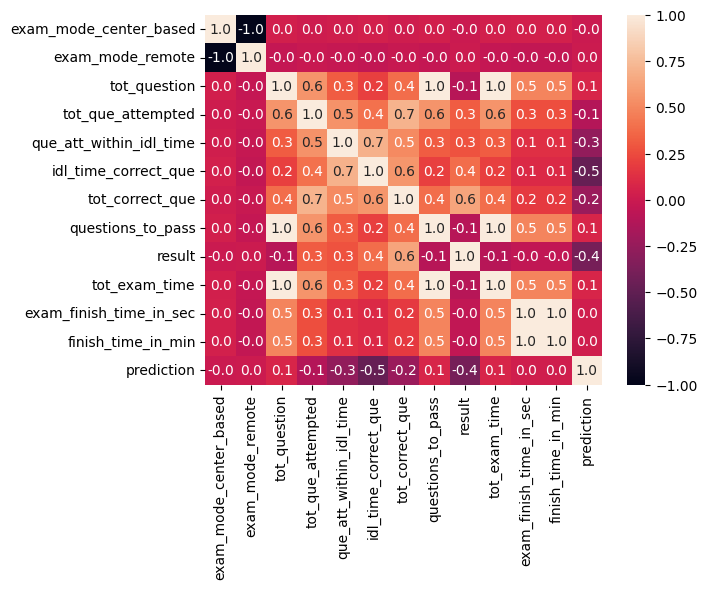

In [17]:
sns.heatmap(dataset.corr(), annot= True, fmt=".1f")

## Process

<li>We successfully completed the dataset preprocessing phase. This process involved several essential data preparation tasks to ensure the data is clean, consistent, and suitable for training a machine learning model.
<li>We carefully addressed missing values present in the dataset. Missing data can adversely affect the model's performance and lead to biased predictions.
<li>To improve the performance of the machine learning model, We identified an effective scaling method for the dataset. Scaling equalizes feature ranges for unbiased learning.


## Analyse

<li>To ensure that the machine learning model generalizes well on unseen data and avoids overfitting, We introduced cross-validation into the training process.
<li>With the dataset preprocessed, scaled, and cross-validation set up, We proceeded to train the chosen machine learning model.
<li>Fine-tuning the model's hyperparameters to optimize performance and avoid potential biases or underfitting.


In [18]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1284, 12), (321, 12), (1284,), (321,))

A Simple Random Forest Implementation

In [20]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
Y_pred = rfc.predict(X_test)

In [21]:
rfc.score(X_test, y_test)

0.9781931464174455

In [22]:
accuracy_score(Y_pred, y_test)

0.9781931464174455

<Axes: >

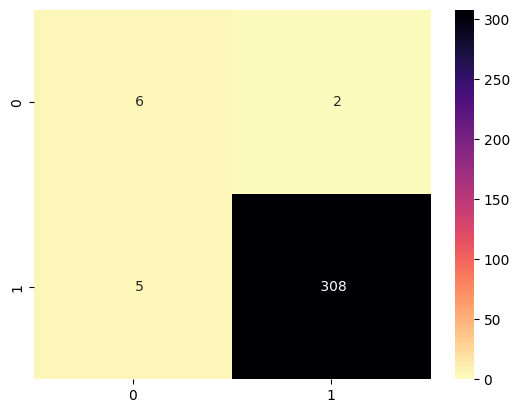

In [23]:
sns.heatmap(confusion_matrix(Y_pred, y_test), annot=True, fmt='4d', vmin=0, cmap='magma_r')

In [24]:
splts = 5
kf = KFold(n_splits=splts)
rfc_kfold = []
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index[0]:train_index[-1]], X[test_index[0]:test_index[-1]], y[train_index[0]:train_index[-1]], y[test_index[0]:test_index[-1]]
    rfc = RandomForestClassifier(5)
    rfc.fit(X_train, y_train)
    rfc_kfold.append(rfc.score(X_test, y_test))

In [25]:
rfc_kfold

[0.971875, 0.99375, 0.996875, 0.99375, 0.98125]

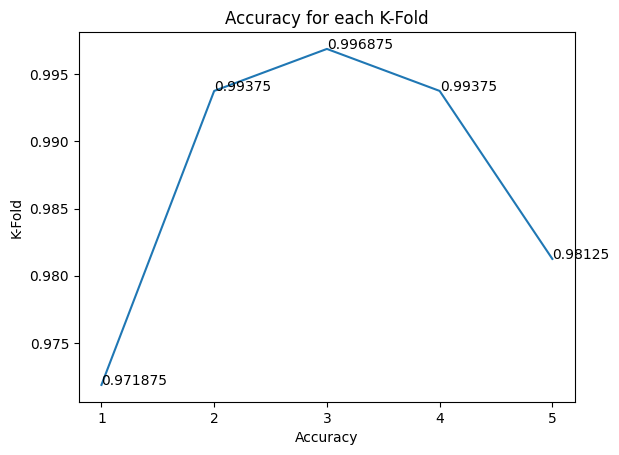

In [26]:
ax = plt.axes()
plt.plot([i + 1 for i in range(splts)], rfc_kfold)
plt.xticks([i + 1 for i in range(splts)])
plt.xlabel("Accuracy")
plt.ylabel("K-Fold")
plt.title("Accuracy for each K-Fold")
for i in range(splts):
    ax.annotate(rfc_kfold[i], (i+1, rfc_kfold[i]), )
plt.show()

## Act

<li>The shift towards online examination modes has brought about numerous advantages in terms of accessibility and convenience for both students and educational institutions. 
<li>More number of students failed the exam, it may be due to the difficulty of Test.
<li>Even though students opted for online based exam (remote) majority of them were genuine.
